In [ ]:
%cd  '/nfs/conditionalDDPM'

## Speckles Data Simulation

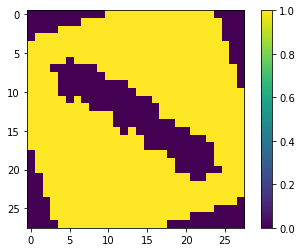

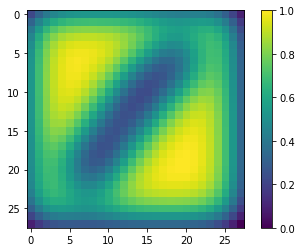

In [1]:
"""Show Data"""

from utils.dataset import import_dataset
import matplotlib.pyplot as plt

def show_image(image):
    
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.show()

data_name='speckles'
batch_size=32
image_size=28
sum_from=0
sum_to=10

train_loader, valid_loader, image_size, channels, dim_mults = import_dataset(data_name, batch_size, image_size, sum_from, sum_to)

x,y = next(iter(train_loader))

N = 2

img,label = x[N,0],y[N,0]

show_image(img)
show_image(label)

In [ ]:
"""Show Fourier Transform Images"""

import torch
from utils.dataset import import_dataset
import matplotlib.pyplot as plt

def show_image(image, title=None):
    
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    if title is not None:
        plt.title(title)
    plt.show()

data_name='speckles'
batch_size=32
image_size=28
sum_from=0
sum_to=10
import_timeseries=False

train_loader, valid_loader, image_size, channels, dim_mults = import_dataset(data_name, batch_size, image_size, sum_from, sum_to, import_timeseries)


x,y = next(iter(valid_loader))

Ns = (1,2,3,4)

"""Plot a few Re Im parts"""

for N in Ns:

    (img,_) = x[N,0],y[N,0] if data_name == 'speckles' else (x[N],y[N])

    img_fft = torch.fft.fft2(img)

    fft_real = img_fft.real
    fft_imag = img_fft.imag

    show_image(img)
    show_image(fft_real)
    show_image(fft_imag)

"""Mixing Re and Im parts"""

# For Speckles
(img,_) = x[N,0],y[N,0] if data_name == 'speckles' else (x[N],y[N])
(img2,_) = x[N+1,0],y[N+1,0] if data_name == 'speckles' else (x[N+1],y[N+1])

img2_fft = torch.fft.fft2(img2)
fft2_real = img2_fft.real
fft2_imag = img2_fft.imag

img_comb = img_fft.clone()
img_comb.imag = fft2_imag
img_rev1 = torch.fft.ifft2(img_comb)

img_comb = img_fft.clone()
img_comb.real = fft2_real
img_rev2 = torch.fft.ifft2(img_comb)

show_image(img, 'img1')
show_image(img2, 'img2')
show_image(img_rev1.real, 'img1 Re + img2 Im')
show_image(img_rev2.real, 'img2 Re + img1 Im')

In [ ]:
"""Show Conditional/Original/Prediction"""

from utils.dataset import import_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_results(exp_name: str,mode: str = 'train'):
    
    print(f'Experiment: {exp_name}\n')

    for i, name in enumerate(['condition','original','pred']):
        print(f'Image: 100-{mode}-{name}.png')
        f, ax = plt.subplots(figsize=(8,8))
        full_name = f'./logs/{exp_name}/100-{mode}-{name}.png'
        image = np.array(Image.open(full_name))
        ax.imshow(image)
        ax.axis('off')
        plt.show()

exp_name = 'speckles0_010'
mode = 'train'

show_results(exp_name, mode)

In [ ]:
"""GBM Dataset"""

from utils.dataset import import_dataset
import matplotlib.pyplot as plt

sum_from = 8
sum_to = 150

data = import_dataset(data_name= 'speckles', batch_size= 32, image_size= 28, 
                      sum_from=sum_from, sum_to=sum_to, import_timeseries=True, sum_every_n_steps=1)
train_loader, valid_loader, image_size, channels, dim_mults = data

y,x = next(iter(valid_loader))

N=2
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(y[N,0])
ax2.imshow(x[N,0])
ax3.imshow(x[N,-1])
print(f"Image Shape: {y.shape} Timeseries shape: {x.shape}")

# Show Images from sum_from to sum_to
# for i in range(1,len(x[N])):
    
#     fig,ax = plt.subplots(1,2, figsize=(10,20))
    
#     plot1 = ax[0].imshow(x[N,i])
#     ax[0].set_title(f't={i}')
    
#     diff = x[N,i]-x[N,i-1]
#     plot2 = ax[1].imshow(diff)
#     ax[1].set_title(f't={i} - t={i-1}')
    
#     plt.colorbar(plot1,ax=ax[0],shrink=0.2)
#     plt.colorbar(plot2,ax=ax[1],shrink=0.2)
    
# # Pixel Evolution
# I=[]
# plt.figure()
# for n in range(0,len(x[N])):
#     I.append(x[N,n,:,:].mean().item())
# plt.scatter(np.linspace(sum_from,sum_to, sum_to-sum_from),I, label=f'x={i}, y={j}')

# Pixel Evolution

init_range = np.linspace(0.,1., 21)
ranges = list(zip(init_range[0:], init_range[1:]))
for r_in, r_out in ranges:
    plt.figure()
    last_values=[]
    for i in range(0,28):
        for j in range(0,28):
            I=[]
            if x[N,1,j,i] > r_in and x[N,1,j,i] < r_out:
                for n in range(0,len(x[N])):
                    I.append(x[N,n,j,i].item())
#                 plt.scatter(np.linspace(sum_from,sum_to, sum_to-sum_from-1),I, label=f'x={i}, y={j}')
                plt.scatter(np.linspace(sum_from,sum_to, sum_to-sum_from-1),I)
                last_values.append(I[-1])
#                 plt.legend()
    if last_values == []:
        last_values=[r_in,r_out]
    plt.title(f'[{r_in:.2f},{r_out:.2f}]-->[{np.array(last_values).min():.2f}, {np.array(last_values).max():.2f}]')

In [ ]:
"""Show Images without integration in time"""

import numpy as np
import os
# test = np.load(os.path.join('data/speckles', f'80.0TMFPs.npz'))['arr_0']

sum_from=7
sum_to=150

# # Image Evolution
# for i in range(sum_from,sum_to):
#     plt.figure()
#     plt.imshow(test[0,:,:,i])
#     plt.colorbar()
#     plt.title('t='+str(i-sum_from))
    

# Pixel Evolution
x,y = 14,14
plt.figure()
for x in range(10,18):
    for y in range(10,18):
        I=[]
        for i in range(sum_from,sum_to):
            I.append(test[0,y,x,i])
        plt.scatter(np.linspace(sum_from,sum_to, sum_to-sum_from),I, label=f'x={x}, y={y}')
        plt.legend()

In [ ]:
"""Show Loss"""

import torch
import os
import matplotlib.pyplot as plt

exp_name = 'speckles0_500'
exp_name = 'light_sheets2_norm_musigma'
save_loss_every = 50

data = torch.load(os.path.join('logs', exp_name, f'model.pt'))
last_step = data['step']
loss = data['loss']
steps = torch.linspace(save_loss_every, last_step, int((last_step+save_loss_every)/save_loss_every))

plt.figure()
plt.scatter(steps, loss)
plt.ylim([0,0.1])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

In [ ]:
"""Compute Entropy"""

%run train.py \
    --dataset=speckles \
    --dataset_path=/nfs/conditionalDDPM/data \
    --logdir=/nfs/conditionalDDPM/logs/speckles0_010 \
    --save_sample_every=1000 \
    --mode=compute_entropy \
    --model_type=c \
    --image_size=28 \
    --sum_from=0 \
    --sum_to=10 \
    --timesteps=1000 \
    --train_num_steps=100000 \
    --loss=l2 \
    --lr=0.00002 \
    --batch_size=32 \
    --device=cuda

In [ ]:
"""Make GIF"""

%run train.py --dataset=speckles \
    --dataset_path=/nfs/conditionalDDPM/data \
    --logdir=/nfs/conditionalDDPM/logs/speckles0_010 \
    --save_sample_every=1000 \
    --mode=gif \
    --model_type=c \
    --image_size=28 \
    --sum_from=0 \
    --sum_to=10 \
    --timesteps=1000 \
    --train_num_steps=100000 \
    --loss=l2 \
    --lr=0.00002 \
    --batch_size=32 \
    --device=cuda

%run train.py --dataset=speckles \
    --dataset_path=/nfs/conditionalDDPM/data \
    --logdir=/nfs/conditionalDDPM/logs/speckles0_050 \
    --save_sample_every=1000 \
    --mode=gif \
    --model_type=c \
    --image_size=28 \
    --sum_from=0 \
    --sum_to=50 \
    --timesteps=1000 \
    --train_num_steps=100000 \
    --loss=l2 \
    --lr=0.00002 \
    --batch_size=32 \
    --device=cuda

%run train.py --dataset=speckles \
    --dataset_path=/nfs/conditionalDDPM/data \
    --logdir=/nfs/conditionalDDPM/logs/speckles0_100 \
    --save_sample_every=1000 \
    --mode=gif \
    --model_type=c \
    --image_size=28 \
    --sum_from=0 \
    --sum_to=100 \
    --timesteps=1000 \
    --train_num_steps=100000 \
    --loss=l2 \
    --lr=0.00002 \
    --batch_size=32 \
    --device=cuda

%run train.py --dataset=speckles \
    --dataset_path=/nfs/conditionalDDPM/data \
    --logdir=/nfs/conditionalDDPM/logs/speckles0_500 \
    --save_sample_every=1000 \
    --mode=gif \
    --model_type=c \
    --image_size=28 \
    --sum_from=0 \
    --sum_to=500 \
    --timesteps=1000 \
    --train_num_steps=100000 \
    --loss=l2 \
    --lr=0.00002 \
    --batch_size=32 \
    --device=cuda

## Light Sheets

In [1]:
"""Show Lightsheets data"""

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_image(img, pos=[0,-1,0,-1], vmin=None, vmax=None, title=None, colorbar=True):
    
    if not vmin:
        vmin=img.min()
    if not vmin:
        vmax=img.max()
        
    a,b,c,d = pos[0],pos[1],pos[2], pos[3]
    plt.figure()
    plt.imshow(img[a:b,c:d], vmin=vmin, vmax=vmax)
    if colorbar:
        plt.colorbar()
    if title is not None:
        plt.title(title)
        
def norm_maxmin(img):
    return (img-img.min())/(img.max()-img.min())

def norm_gauss(img):
    return (img-img.mean())/(img.std())

def norm_energy(img):
    return img/img.mean()

data_path = './data/light_sheets'

Position 2 --> z_shift 9 x_shift 45 energy 35.26
Position 3 --> z_shift 13 x_shift 86 energy 32.90
Position 4 --> z_shift 17 x_shift 126 energy 32.09
Position 5 --> z_shift 19 x_shift 156 energy 30.43
Position 6 --> z_shift 22 x_shift 189 energy 28.99
Position 7 --> z_shift 26 x_shift 227 energy 27.78
Position 8 --> z_shift 30 x_shift 265 energy 26.82
Position 9 --> z_shift 34 x_shift 302 energy 26.19
Position 10 --> z_shift 38 x_shift 340 energy 26.64
Position 11 --> z_shift 42 x_shift 376 energy 25.73
Position 12 --> z_shift 46 x_shift 416 energy 24.79
Position 13 --> z_shift 50 x_shift 456 energy 23.61
Position 14 --> z_shift 54 x_shift 497 energy 22.70
Position 15 --> z_shift 58 x_shift 532 energy 22.07
Position 16 --> z_shift 62 x_shift 569 energy 21.23
Position 17 --> z_shift 66 x_shift 607 energy 19.87

Tiling images


100%|██████████| 35/35 [00:06<00:00,  5.75it/s]


Saving Tiles

Dataset containes 10864 tiles
Light Sheet data imported!
tensor(0.4020)


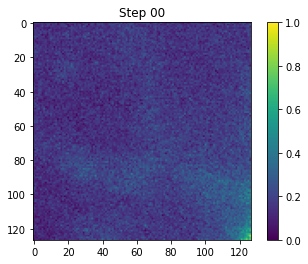

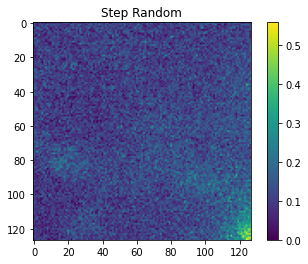

In [5]:
"""Import from dataset class"""

from utils.dataset import import_dataset
from torchvision.transforms import GaussianBlur

# name = 'light_sheets_full'
# name = 'light_sheets_ae'
name = 'light_sheets_seq'
save_seq = False

train_loader, valid_loader, image_size, channels, dim_mults = import_dataset(data_name=name, 
                                                                             batch_size=32, 
                                                                             image_size = 128,
                                                                             force_download = True)

x,y = next(iter(valid_loader))

N = 12

if name.endswith('seq'):
#     energy = []
#     for img in y[N,0]:
#         energy.append(img.mean())    
#     plt.plot(np.linspace(1,len(energy),len(energy)),energy)
#     plt.xlabel('x_stack')
#     plt.ylabel('Energy')
#     plt.show()
    if save_seq:
        for i in range(y.shape[2]):
            step = y[N,0,i].clone()
            show_image(step, vmin=0, vmax= y[N,0,0].max(), colorbar=False, title=f'seq_{i:02d}')
            plt.xticks([])
            plt.yticks([])
            data_path = './results/sequence'
            if not os.path.exists(data_path):
                os.makedirs(data_path)
            plt.savefig(os.path.join(data_path,f'seq_{i:02d}.png'))
    else:
        step = 15
#         x,y = y[N,0,0],y[N,0,step]
        x,y = x[N,0],y[N,0]
        print(x.std()/x.mean())

        show_image(x, title='Step 00')
#         show_image(y, title=f'Step {step:02d}')
        show_image(y, title=f'Step Random')


# if name.endswith('ae') or name.endswith('full') or name.endswith('seq'):
#     x,y = x[N,0], y[N,0]
    
#     # print("Train Images: ", len(train_loader))
#     show_image(x, title='Clean')
#     show_image(y, title='Noisy')
#     print(x.mean(), x.std())

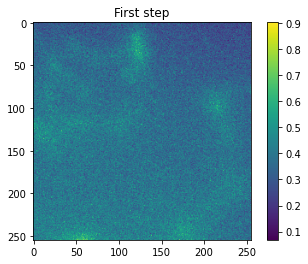

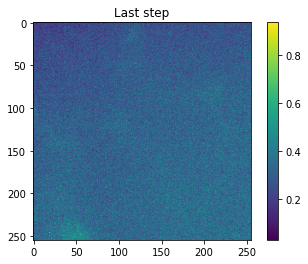

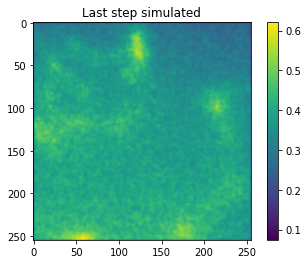

In [41]:
"""Heat equation"""
# https://srome.github.io/Why-Blurring-an-Image-is-Similar-to-Warming-Your-Coffee/

import torch
from torch import Tensor
import torch.nn.functional as F

def update_step(img: Tensor, steps: int = 1, dt: float = 0.1):
    assert img.ndim == 4, 'Image should be (B,C,H,W)'
    vmax,vmin = img.max(),img.min()
    for i in range(steps):
        laplacian_kernel = Tensor([[0,1,0],[1.,-4,1],[0,1,0]], device=img.device)[None,None]
        img += dt*F.conv2d(img,kernel, padding=1)
    return img

name = 'light_sheets_seq'
# train_loader, valid_loader, image_size, channels, dim_mults = import_dataset(data_name=name, batch_size=32, image_size = 256)

x,y = next(iter(valid_loader))
N = 0

step_first = y[N,0,0]
step_last = y[N,0,-1]
step_last_simulated = update_step(step_first[None,None].clone(), steps=1, dt=0.1)[0,0]

show_image(step_first,title='First step')
show_image(step_last,title='Last step')
show_image(step_last_simulated,title='Last step simulated')

In [30]:
list(map(lambda x: x*2, (13,13)))

[26, 26]

In [ ]:
"""Show image 39"""
img = np.load(os.path.join(data_path, f'pos39_ims.npz'), allow_pickle=True)['arr_0']
show_image(img[10], title='Image 1')

"""Remark: image 39 not good"""

In [ ]:
"""Check Clear Left/More Blur Right"""

"""Show image 39"""
img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
show_image(img[1], title='Full Image')
show_image(img[1,700:900,:200], title='Left-hand side')
show_image(img[1,700:900,800:1000], title='Right-hand side')

In [ ]:
"""Show one images"""
img1 = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img10 = np.load(os.path.join(data_path, f'pos10_ims.npz'), allow_pickle=True)['arr_0']
img20 = np.load(os.path.join(data_path, f'pos20_ims.npz'), allow_pickle=True)['arr_0']
img30 = np.load(os.path.join(data_path, f'pos30_ims.npz'), allow_pickle=True)['arr_0']
img40 = np.load(os.path.join(data_path, f'pos40_ims.npz'), allow_pickle=True)['arr_0']

print("Remark: More Blurry on the Right, More clear on the Left")
print(f'Image shape: {img1.shape}')

show_image(img1[0], title='Image 1')
show_image(img10[0], title='Image 10')
show_image(img20[0], title='Image 20')
show_image(img30[0], title='Image 30')
show_image(img40[0], title='Image 40')
show_image(img1[0], [600,1000,0,200], 'Left')
show_image(img1[0], [400,800,400,600], 'Center')
show_image(img1[0], [300,700,800,1000], 'Right')

show_image(img30[0], [300,700,200,400], 'Right Shifted by 600pixels on the left')


In [ ]:
"""Show Stripe"""
img45 = np.load(os.path.join(data_path, f'pos45_ims.npz'), allow_pickle=True)['arr_0']

img45 = img45[:,:,:128]
N=0

show_image(img45[N], title='gt')
for n in reversed(range(1,45)):
    img = np.load(os.path.join(data_path, f'pos{n}_ims.npz'), allow_pickle=True)['arr_0']
    img = img[:,:,(n*20):(128+n*20)]
    show_image(img[N], title=f'x {n}')

In [ ]:
"""Show same image acquired N times"""
img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
for i in range(len(img)):
    pos=[0,-1,0,-1]
#     pos=[800,900,400,500]

    show_image(img[i],pos)

In [ ]:
"Show positions from 1 to 45"

for i in range(1,46):
    img = np.load(os.path.join(data_path, f'pos{i}_ims.npz'), allow_pickle=True)['arr_0']
    
    show_image(img[20], colorbar=False, title=f'{i}')

In [ ]:
"""Show Differences"""
img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img2 = np.load(os.path.join(data_path, f'pos2_ims.npz'), allow_pickle=True)['arr_0']

img = norm(img)
img2 = norm(img2)

shift = 20

show_image(img[0],title='img1')
show_image(img2[0],title='img2')

for i in range(1,shift+1):
    pos=[0,-1,0,-1]
#     pos=[800,900,400,500]
    diff = img[0,:,i:]-img2[0,:,:-i]
    show_image(diff, pos, f'shift={i} Mean = {diff.mean():.4f}')
#     show_image(img[i]-img2[i],pos)

In [ ]:
"""Check 20 pixels shifts"""

for i in range(2,54):
    img = np.load(os.path.join(data_path, f'pos{i}_ims.npz'), allow_pickle=True)['arr_0']
    
    show_image(img[0, :128, 896-(i-1)*20:-(i-1)*20], title=f'Image {i}')

In [ ]:
"""Plot intensity along rows"""
img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']

for i in range(1000):
    plt.figure()
    plt.plot(img[0, i])
    plt.title(f'row {i}')

In [ ]:
"""Patch in tiles"""
import torch
            
def patch(img):
    """Patch a batch of images in tiles (size,stride)"""
    b,h,w = img.shape
    size = 128 # patch size
    stride = 128 # patch stride
    return (img.unfold(1, size, stride).unfold(2, size, stride)).reshape(b,-1,size,stride)

def unpatch(patches):
    """Patch a batch of images in tiles (size,stride)"""
    b,p,h,w = patches.shape
    size = 128 # patch size
    stride = 128 # patch stride
    return (img.unfold(1, size, stride).unfold(2, size, stride)).reshape(b,-1,size,stride)

img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img = torch.tensor(img)

img = img[:,:,20:]

patches = patch(img)

show_image(img[0,128:256,:128])
show_image(patches[0,8])
diff = patches[0,0] - img[0,:128,:128]
show_image(diff)

In [ ]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)
            
            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)
            
            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)
    
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

ssim_loss = SSIM()

# img1 = Tensor(tiff.imread(f'./data/light_sheets/Pos{1:02d}/img_channel000_position{1:03d}_time000000000_z{4:03d}.tif').astype(np.int32))

# metrics=[]
# for i in range(101):
#     img = Tensor(tiff.imread(f'./data/light_sheets/Pos{11:02d}/img_channel000_position{11:03d}_time000000000_z{i:03d}.tif').astype(np.int32))
# #     diff.append(((img1[a:b,c+10*shift:d]-img[a:b,c:d-10*shift])**2).mean())
#     img_ref = img1[a:b,c+10*shift:d][None,None]
#     img_test = img[a:b,c:d-10*shift][None,None]
    
#     metrics.append(ssim_loss(img_ref,img_test))
# metrics.index(max(metrics))

In [ ]:
"""Found coincidence!!!!!!!!!!"""

import os
import tifffile as tiff
import numpy as np
from torch import Tensor
import matplotlib.pyplot as plt

a,b,c,d=0,400,400,-1

shift = 40
pos_diff = 2
img1 = Tensor(tiff.imread(f'./data/light_sheets/Pos{1:02d}/img_channel000_position{1:03d}_time000000000_z{4:03d}.tif').astype(np.int32))
show_image(img1[a:b,c+pos_diff*shift:d], colorbar=False)
# img2 = Tensor(tiff.imread(f'./data/light_sheets/Pos{2:02d}/img_channel000_position{2:03d}_time000000000_z{10:03d}.tif').astype(np.int32))
# shift = 44
# show_image(img2[a:b,c:d-pos_diff*shift], title=str(i), colorbar=False)
    
# for i in range(10,20):
#     img3 = Tensor(tiff.imread(f'./data/light_sheets/Pos{3:02d}/img_channel000_position{3:03d}_time000000000_z{i:03d}.tif').astype(np.int32))
#     show_image(img3[a:b,c:d-pos_diff*shift], title=str(i), colorbar=False)

for i in range(38,42):
    for shift in range(38,42):
        img3 = Tensor(tiff.imread(f'./data/light_sheets/Pos{11:02d}/img_channel000_position{11:03d}_time000000000_z{i:03d}.tif').astype(np.int32))
        show_image(img1[a:b,c+pos_diff*shift:d] - img3[a:b,c:d-pos_diff*shift], title=f'z_stack {i} shift {shift}', colorbar=True)


# img11 = Tensor(tiff.imread(f'./data/light_sheets/Pos{11:02d}/img_channel000_position{11:03d}_time000000000_z{40:03d}.tif').astype(np.int32))
# shift=38
# show_image(img2[a:b,c:d-10*shift], colorbar=False)


In [ ]:
"""Check for the whole z-stack"""

z_shift=4
positions =   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15]
shifts =      [40, 0,40,40,40,40,40,40,40,40,40,38,40,40,40,40]
z_shifts =    [ 0, 4,10,16,16,20,24,28,32,36,40,40,44,48,52,56]
i=0
img_ref = Tensor(tiff.imread(f'./data/light_sheets/Pos{1:02d}/img_channel000_position{1:03d}_time000000000_z{4:03d}.tif').astype(np.int32))
while i*z_shift < 101 and i < positions[-1]:
    img = Tensor(tiff.imread(f'./data/light_sheets/Pos{i:02d}/img_channel000_position{i:03d}_time000000000_z{z_shifts[i]:03d}.tif').astype(np.int32))
    img = img[:400,:-i*shifts[i]] if i>1 else img[:400]
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(20,20))
    ax0.imshow(img_ref[:400,i*shifts[i]:])
    ax0.set_title(f'Pos{1:02d}, z{4:03d}')
    ax1.imshow(img)
    ax1.set_title(f'Pos{i:02d}, z{z_shifts[i]:03d}')
    ax2.imshow(img_ref[:400,i*shifts[i]:]-img)
    ax2.set_title(f'Difference')
    i+=1

In [ ]:
"""Open metadata as json"""

In [ ]:
"""Widgets"""
# import ipywidgets as widgets
# from IPython.display import display

# image1 = [Tensor(tiff.imread(f'./data/light_sheets/Pos{6:02d}/img_channel000_position{6:03d}_time000000000_z{i:03d}.tif').astype(np.int32)) for i in range(101)]

# def show(n):
#     show_image(image1[n])
    
# widgets.interact(show, n=range(101))

# def f(x):
#     return x

# out = widgets.interact(f, x=10)
# display(out)
# widgets.Dropdown(
#     options=['1', '2', '3'],
#     value='2',
#     description='Number:',
#     disabled=False,
# )

# !jupyter nbextension install --user --py widgetsnbextension
# !jupyter nbextension enable --user --py widgetsnbextension
# !jupyter lab clean
# !jupyter lab build""""""

In [ ]:
"""Compute Frechet Inception Distance"""

import numpy as np
from scipy.linalg import sqrtm

def calculate_fid(act1, act2):
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

img = np.load(os.path.join(data_path, f'pos45_ims.npz'), allow_pickle=True)['arr_0']

_,h,w = img.shape

img_left1 = img[0,600:728,:128]
img_left2 = img[0,728:856,:128]
img_right1 = img[0,600:728,w-128:]
img_right2 = img[0,728:856,w-128:]


show_image(img_left1, title='Left 1')
show_image(img_left2, title='Left 2')
show_image(img_right1, title='Right 1')
show_image(img_right2, title='Right 2')

print("Between two regions on the left-hand side, FID:", calculate_fid(img_left1, img_left2))
print("Between two regions on the right-hand side, FID:", calculate_fid(img_right1, img_right2))
print("Between one region in the left-hand side and one in the right-hand side, FID", calculate_fid(img_left1, img_right1))

In [ ]:
"""Detect Blur in an image"""
import torch

img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img = torch.tensor(img)

def laplacian(xs, f, create_graph=False, keep_graph=None, return_grad=False):
    xis = [xi.requires_grad_() for xi in xs.flatten(start_dim=1).t()]
    xs_flat = torch.stack(xis, dim=1)
    ys = f(xs_flat.view_as(xs))
    (ys_g, *other) = ys if isinstance(ys, tuple) else (ys, ())
    ones = torch.ones_like(ys_g)
    (dy_dxs,) = torch.autograd.grad(ys_g, xs_flat, ones, create_graph=True)
    lap_ys = sum(
        torch.autograd.grad(
            dy_dxi, xi, ones, retain_graph=True, create_graph=create_graph
        )[0]
        for xi, dy_dxi in zip(xis, (dy_dxs[..., i] for i in range(len(xis))))
    )
    if not (create_graph if keep_graph is None else keep_graph):
        ys = (ys_g.detach(), *other) if isinstance(ys, tuple) else ys.detach()
    result = lap_ys, ys
    if return_grad:
        result += (dy_dxs.detach().view_as(xs),)
    return result

laplacian(img)

In [ ]:
import torch
from torch.autograd import grad

img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img = torch.tensor(img, dtype=torch.double)

def nth_derivative(f, wrt, n):

    for i in range(n):

        grads = grad(f, wrt, create_graph=True)[0]
        f = grads.sum()

    return grads

x = torch.arange(4, requires_grad=True).reshape(2, 2)
loss = (x ** 4).sum()

print(nth_derivative(f=loss, wrt=x, n=2))

In [ ]:
import torch
import torch.nn.functional as F

img = np.load(os.path.join(data_path, f'pos1_ims.npz'), allow_pickle=True)['arr_0']
img = torch.tensor(img, dtype=torch.double)[:,None]
img = norm(img)

Gx = torch.tensor([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=torch.double)[None,None]
Gy = torch.tensor([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=torch.double)[None,None]

G = torch.sqrt(Gx*Gx + Gy*Gy)
gradx = F.conv2d(img, Gx) 
grady = F.conv2d(img, Gy) 

grad = torch.sqrt(gradx**2 + grady**2)

show_image(gradx[0,0],[400,600,400,600])
show_image(grady[0,0],[400,600,400,600])
show_image(grad[0,0])

In [ ]:
"""Try BM3D"""

import tifffile as tiff
import numpy as np

image_noisy = tiff.imread(f'./data/light_sheets/Pos{1:02d}/img_channel000_position{1:03d}_time000000000_z{4:03d}.tif').astype(np.int32)

denoised_image = bm3d(image_noisy, sigma_psd=30/255)

In [ ]:
# import numpy as np
# import skimage.data

# import pybm3d


# noise_std_dev = 40
# img = skimage.data.astronaut()
# noise = np.random.normal(scale=noise_std_dev,
#                          size=img.shape).astype(img.dtype)

# noisy_img = img + noise

# out = pybm3d.bm3d.bm3d(noisy_img, noise_std_dev)


# print("PSNR of noisy image: ", noise_psnr)
# print("PSNR of reconstructed image: ", out_psnr)

!pip install pybm3d